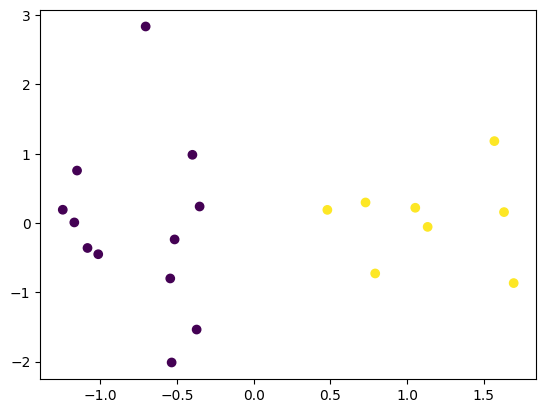

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors, kneighbors_graph
from scipy.sparse.csgraph import connected_components
from scipy.sparse import csr_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Generate sample data
# np.random.seed(0)
# X = np.vstack((np.random.randn(100, 2) ,
#                np.random.randn(100, 2) + np.array([5, 5])))
# Plot the data
# plt.scatter(X[:,0], X[:,1])

df = pd.read_csv('dataset/test/manual_data.csv')
df = [[-0.85673506, -0.09326591],
       [-2.06846063,  0.07485079],
       [ 2.81672179, -0.3403223 ],
       [-0.90386811, -0.31415829],
       [-1.91388751,  0.2967344 ],
       [ 1.21185304,  0.11603131],
       [-0.58586901,  0.0932076 ],
       [-1.17044924,  1.11245742],
       [-0.88903104, -0.78985994],
       [ 2.7121504 ,  0.06158548],
       [-0.66388178,  0.38591141],
       [-1.94331481,  0.00303937],
       [ 1.88471516, -0.02213341],
       [ 0.79813542,  0.07417187],
       [ 1.75071647,  0.08607933],
       [-1.6841703 , -0.1769848 ],
       [ 1.31642443, -0.28587646],
       [ 2.60757901,  0.46349325],
       [-1.80046325, -0.1415747 ],
       [-0.61816498, -0.60338643]]
# df = pd.read_csv('dataset/temp/dataset.csv')
# df = df.apply(LabelEncoder().fit_transform)
scaler = StandardScaler()
scale = scaler.fit_transform(df)
X = scale

# Define parameters for KNN and KDE
n_neighbors = 3
bandwidth = 1.0

# Perform KNN to identify core points
knn = NearestNeighbors(n_neighbors=n_neighbors)
knn.fit(X)
dist, indices = knn.kneighbors(X)
# A = kneighbors_graph(knn, n_neighbors=n_neighbors, mode='distance')
data = np.maximum(0, 1 - dist / bandwidth)
indptr = np.arange(len(X) + 1) * n_neighbors
indices = indices.ravel()
A = csr_matrix((data.ravel(), indices, indptr), shape=(len(X), len(X)))
n_components, labels = connected_components(csgraph=A, directed=False, return_labels=True)

# # Perform KDE on all points
# kde = KernelDensity(kernel='gaussian', bandwidth=bandwidth)
# kde.fit(X)
# log_dens = kde.score_samples(X)

# Plot the clusters
plt.scatter(X[:,0], X[:,1], c=labels)
plt.show()


In [77]:
labels

array([0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0])

In [78]:
data

array([[1.        , 0.58421381, 0.58421381, 0.56648051],
       [1.        , 0.92534975, 0.83555283, 0.79319073],
       [1.        , 0.62813715, 0.        , 0.        ],
       [1.        , 0.53461938, 0.49893538, 0.49487631],
       [1.        , 0.73709485, 0.72670204, 0.68990004],
       [1.        , 0.86581806, 0.53562059, 0.16589166],
       [1.        , 0.53461938, 0.48333069, 0.43752692],
       [1.        , 0.57065997, 0.38202925, 0.36544024],
       [1.        , 0.53827729, 0.52964455, 0.50275071],
       [1.        , 0.62813715, 0.26297058, 0.        ],
       [1.        , 0.57065997, 0.51699161, 0.4312203 ],
       [1.        , 0.92534975, 0.89838853, 0.78013018],
       [1.        , 0.93106358, 0.27989127, 0.13512356],
       [1.        , 0.86581806, 0.44286733, 0.03270771],
       [1.        , 0.93106358, 0.28319853, 0.16589166],
       [1.        , 0.89838853, 0.83555283, 0.79677706],
       [1.        , 0.53562059, 0.44286733, 0.28319853],
       [1.        , 0.26297058,